# Third assignment: Social contagion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import collections, itertools

from random import choice
from networkx.algorithms import community

#from networkx.algorithms.community.quality import modularity
#from networkx.algorithms import community
#from networkx.algorithms.community import greedy_modularity_communities

In [167]:
def init_labels():
    labels={}
    for node in G.nodes():
        labels[node] = 'b'
    return labels

def susceptibleList(labeledNodes):
    return [k for k,v in labeledNodes.items() if v=='b']

def spread_contagion(labeledNodes, decisionPO):
    i = 1
    
    while True:
        current = list(labeledNodes.values())
        susc = susceptibleList(labeledNodes)
        
        for node in susc:
            
            edgelist = []
            for pair in list(G.edges()):
                if node not in pair:
                    continue
                edgelist.append(pair[1] if pair[0]==node else pair[0])
            
            num_neigb = len(edgelist)
            infct_neigb = len([friend for friend in edgelist if labeledNodes[friend]=='r'])
            if num_neigb!=0 and (infct_neigb/num_neigb >= decisionPO):
                labeledNodes[node]='r'
                susc.remove(node)

        plt.figure(figsize=(15,8))
        plt.title("iteration {}: #Susceptible:{}, #Infected:{}"
                  .format(i,len(susc),len(labeledNodes)-len(susc)))
        nx.draw_networkx(G, pos, node_color=labeledNodes.values(), font_size=10, node_size=80) 
        plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\Rg_plow\\random\\spread'+str(i)+'.png')

        if current==list(labeledNodes.values()): break
        
        i+=1

## 1. Toy Graph - Davis_southern_women_graph

In [ ]:
G = nx.davis_southern_women_graph()
pos = nx.spring_layout(G)

In [ ]:
plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,font_size=10,node_size=50)

#Print node numbers 
print("Number of nodes:",G.number_of_nodes())
#Print edges number G.number_of_edges()
print("Number of edges:",G.number_of_edges())

### Payoff matrix definition

In [ ]:
equal_po = np.eye(2)
q_equal = equal_po[1,1]/(equal_po[0,0]+equal_po[1,1])

In [ ]:
a_po = equal_po + [[1,0],[0,0]]
q_a = a_po[1,1]/(a_po[0,0]+a_po[1,1])

In [ ]:
labels = init_labels()

plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\random\\init.png')


## Random infection 

In [ ]:
def random_infection(labeledNodes):
    susc = susceptibleList(labeledNodes)
    newInfected = choice(susc)
    labels[newInfected] = 'r'
    return newInfected

In [ ]:
labels = init_labels()

In [ ]:
random_infection(labels)

In [ ]:
susceptibles = susceptibleList(labels)

plt.figure(figsize=(15,8))
plt.title("#Susceptibles:{}, #Infected:{}".format(len(susceptibles),len(labels)-len(susceptibles)))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\random\\randominf.png')

In [ ]:
spread_contagion(labels, q_a)

## Nodes-measure guided Infections

In [ ]:
def metric_infection(labeledNodes, metricFunction):
    susc = susceptibleList(labeledNodes)
    ranked_closeness = sorted(metricFunction(G).items(), key=lambda pair:pair[1], reverse=True)
    
    for node,_ in ranked_closeness:
        if node in susc:
            labeledNodes[node]='r'
            break
    
    return node

### Closeness derived infection

In [ ]:
sorted(nx.closeness_centrality(G).items(), key=lambda pair:pair[1], reverse=True)

In [ ]:
a_po = equal_po + [[2,0],[0,0]]
q_a = a_po[1,1]/(a_po[0,0]+a_po[1,1])

labels = init_labels()
plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\closeness\\init.png')

In [ ]:
metric_infection(labels, nx.closeness_centrality)

In [ ]:
susceptibles = susceptibleList(labels)

plt.figure(figsize=(15,8))
plt.title("#Susceptibles:{}, #Infected:{}".format(len(susceptibles),len(labels)-len(susceptibles)))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\closeness\\randominf.png')

In [ ]:
spread_contagion(labels, q_a)

### Betweenness derived infection

In [ ]:
sorted(nx.betweenness_centrality(G).items(), key=lambda pair:pair[1], reverse=True)

In [ ]:
a_po = equal_po + [[2,0],[0,0]]
q_a = a_po[1,1]/(a_po[0,0]+a_po[1,1])

labels = init_labels()
plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\betweenness\\init.png')

In [ ]:
metric_infection(labels, nx.betweenness_centrality)

In [ ]:
susceptibles = susceptibleList(labels)

plt.figure(figsize=(15,8))
plt.title("#Susceptibles:{}, #Infected:{}".format(len(susceptibles),len(labels)-len(susceptibles)))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\betweenness\\randominf.png')

In [ ]:
spread_contagion(labels, q_a)

## 2. Toy Graph - Random graph

Number of nodes: 100
Number of edges: 93


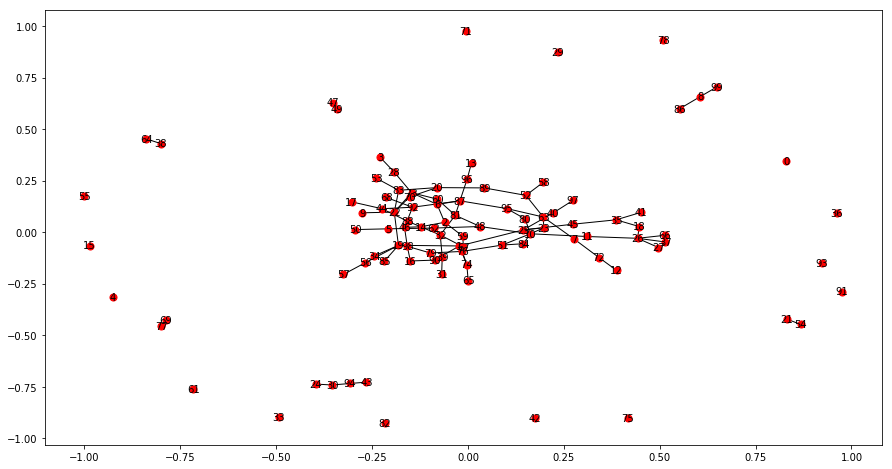

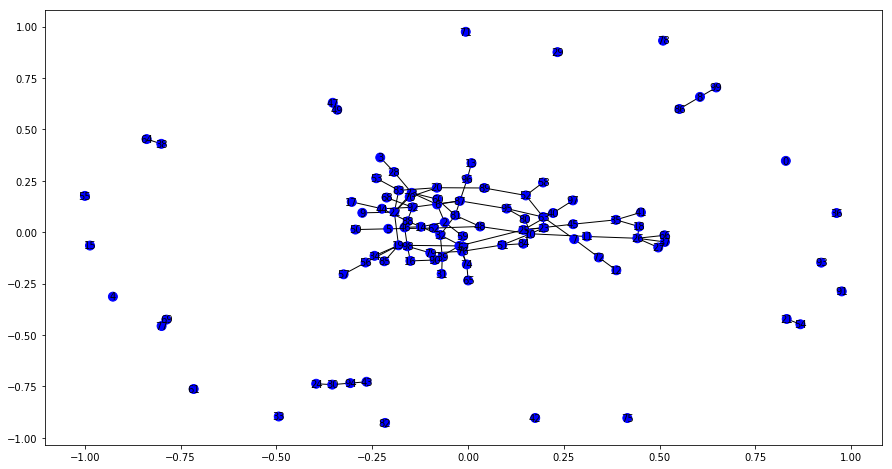

In [161]:
G = nx.gnp_random_graph(100,0.02)
pos = nx.spring_layout(G)

plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,font_size=10,node_size=50)

#Print node numbers 
print("Number of nodes:",G.number_of_nodes())
#Print edges number G.number_of_edges()
print("Number of edges:",G.number_of_edges())

equal_po = np.eye(2)
q_equal = equal_po[1,1]/(equal_po[0,0]+equal_po[1,1])

a_po = equal_po + [[1,0],[0,0]]
q_a = a_po[1,1]/(a_po[0,0]+a_po[1,1])

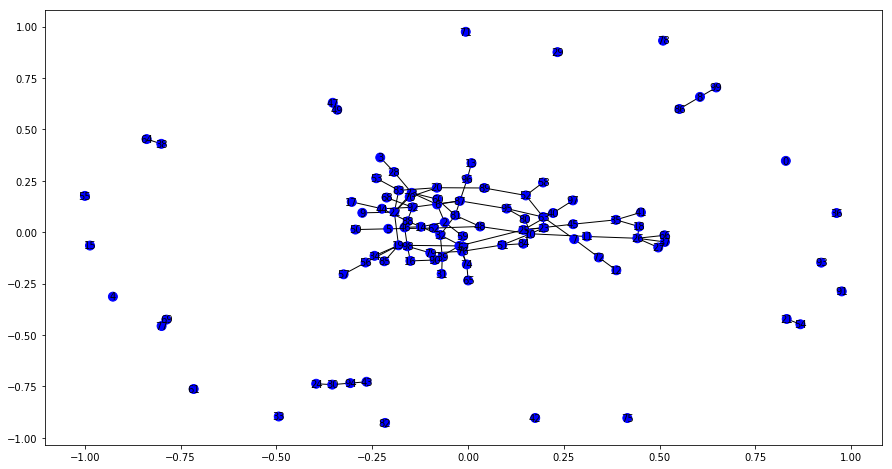

In [169]:
labels = init_labels()

plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\Rg_plow\\random\\init.png')

## Random infection 

In [170]:
def random_infection(labeledNodes):
    susc = susceptibleList(labeledNodes)
    newInfected = choice(susc)
    labels[newInfected] = 'r'
    return newInfected

In [171]:
labels = init_labels()

In [172]:
random_infection(labels)

3

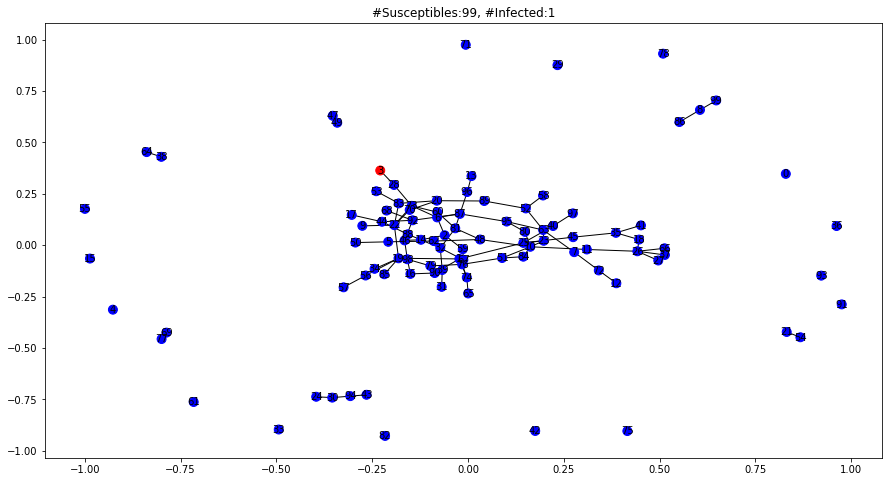

In [173]:
susceptibles = susceptibleList(labels)

plt.figure(figsize=(15,8))
plt.title("#Susceptibles:{}, #Infected:{}".format(len(susceptibles),len(labels)-len(susceptibles)))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\Rg_plow\\random\\randominf.png')

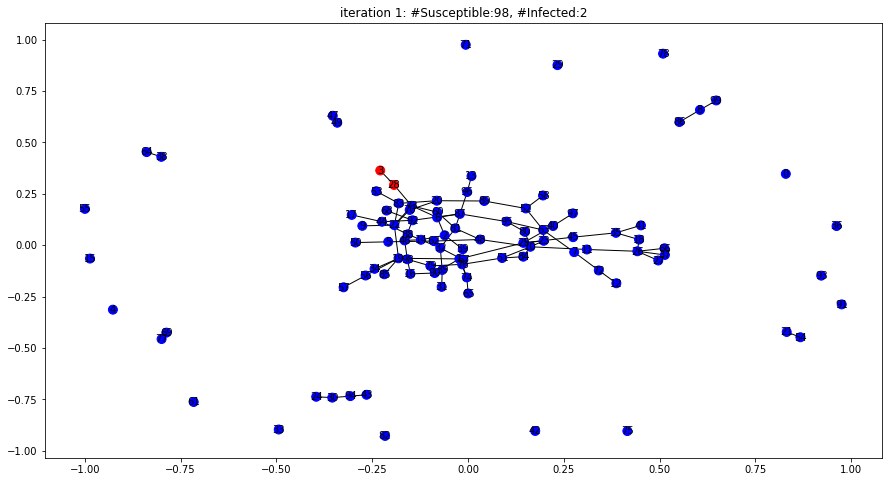

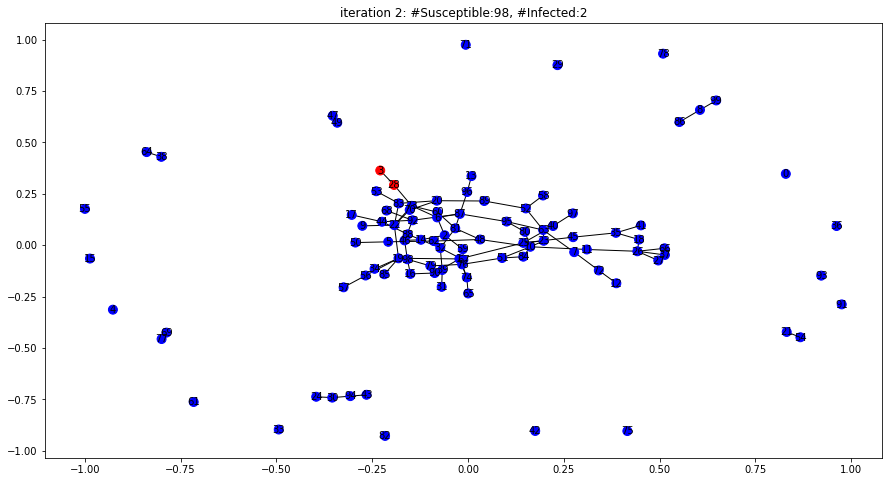

In [174]:
spread_contagion(labels, q_equal)

## Nodes-measure guided Infections

In [55]:
def metric_infection(labeledNodes, metricFunction):
    susc = susceptibleList(labeledNodes)
    ranked_closeness = sorted(metricFunction(G).items(), key=lambda pair:pair[1], reverse=True)
    
    for node,_ in ranked_closeness:
        if node in susc:
            labeledNodes[node]='r'
            break
    
    return node

### Closeness derived infection

In [154]:
#sorted(nx.closeness_centrality(G).items(), key=lambda pair:pair[1], reverse=True)

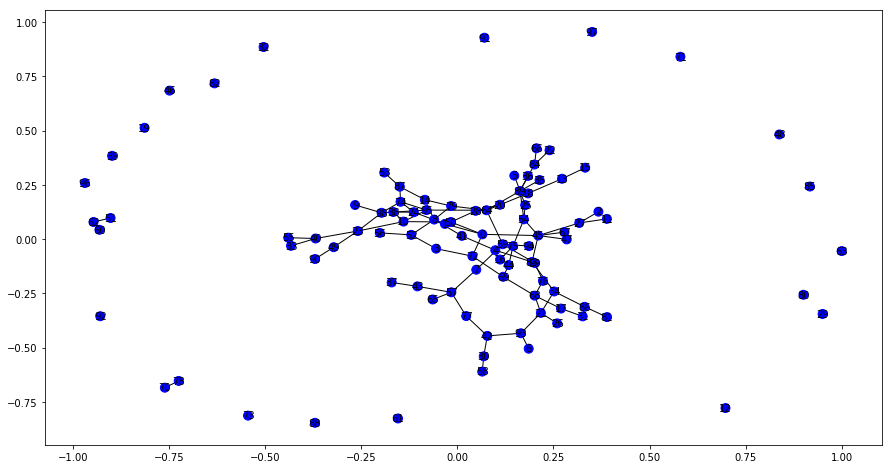

In [150]:
a_po = equal_po + [[3,0],[0,0]]
q_a = a_po[1,1]/(a_po[0,0]+a_po[1,1])

labels = init_labels()
plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\closeness\\init.png')

In [151]:
metric_infection(labels, nx.closeness_centrality)

64

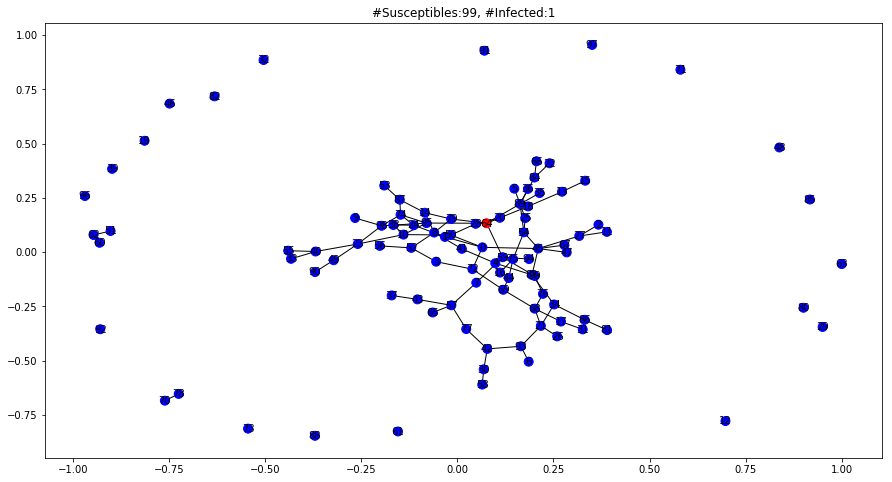

In [152]:
susceptibles = susceptibleList(labels)

plt.figure(figsize=(15,8))
plt.title("#Susceptibles:{}, #Infected:{}".format(len(susceptibles),len(labels)-len(susceptibles)))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\closeness\\randominf.png')

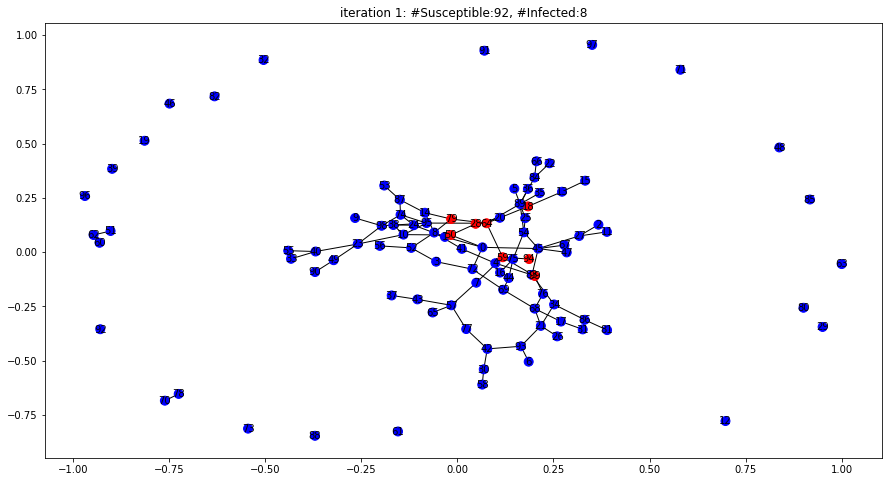

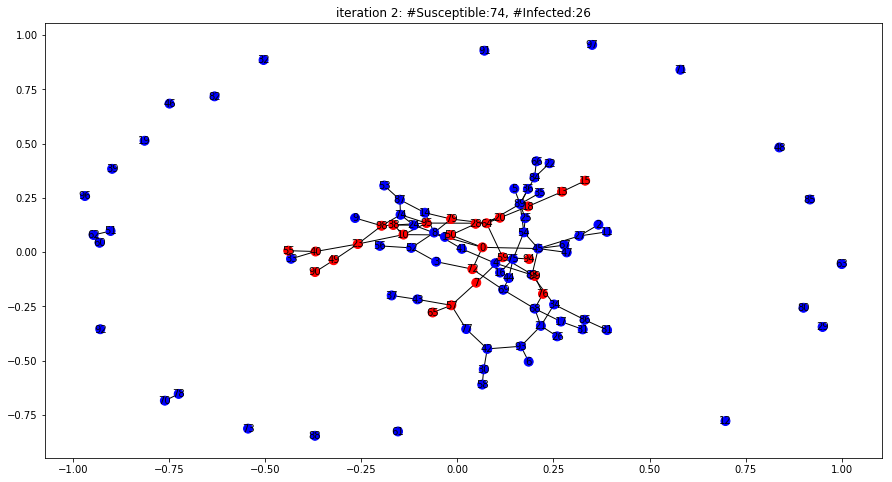

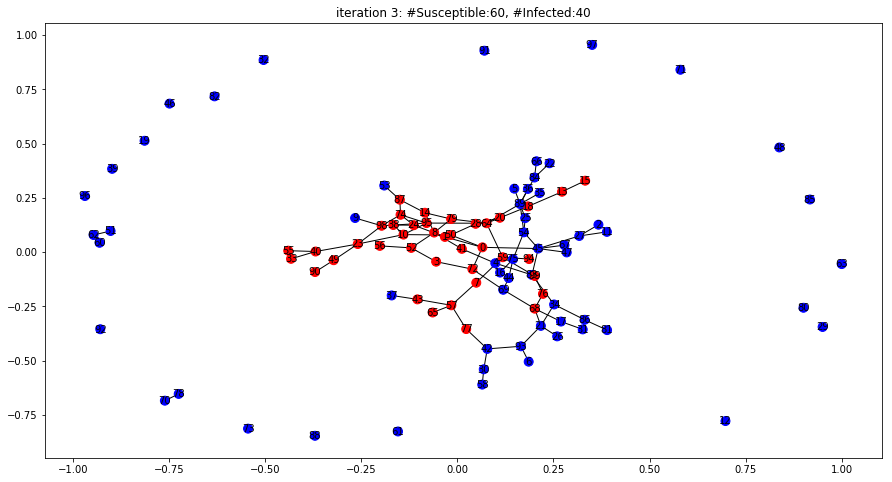

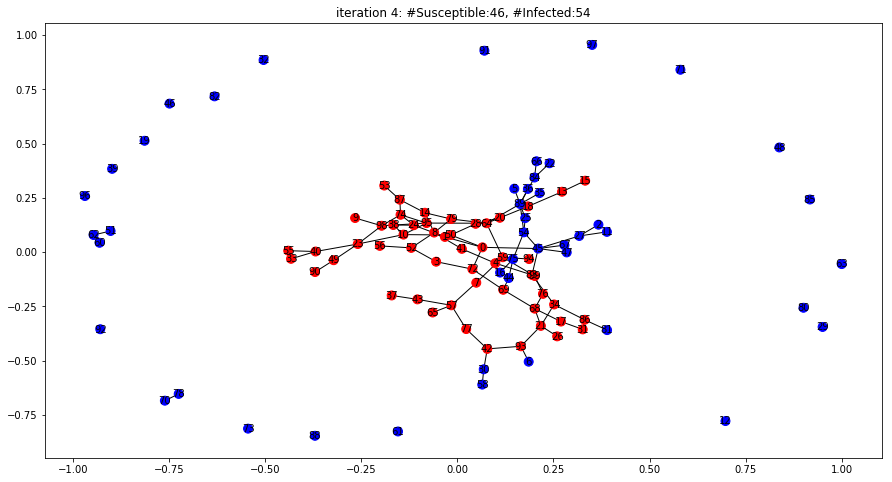

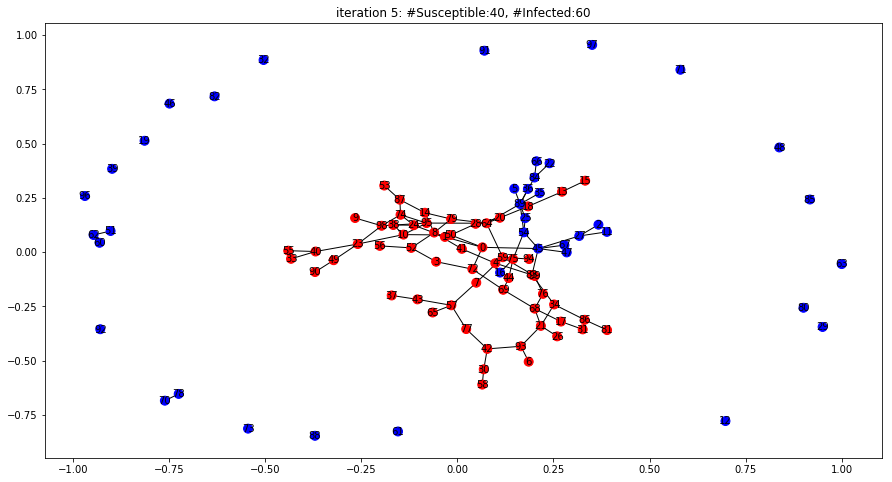

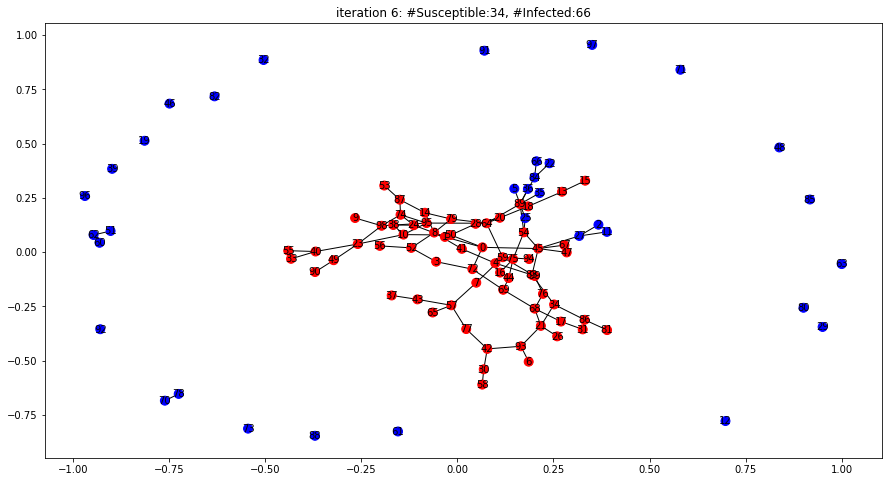

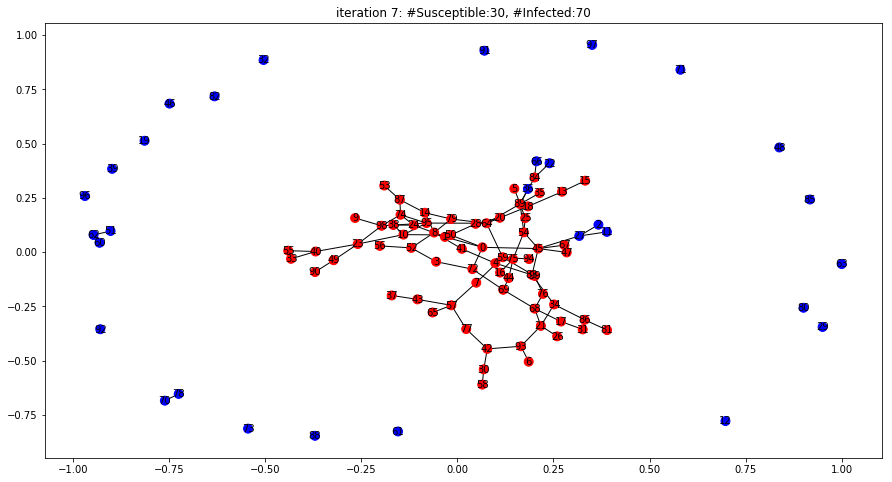

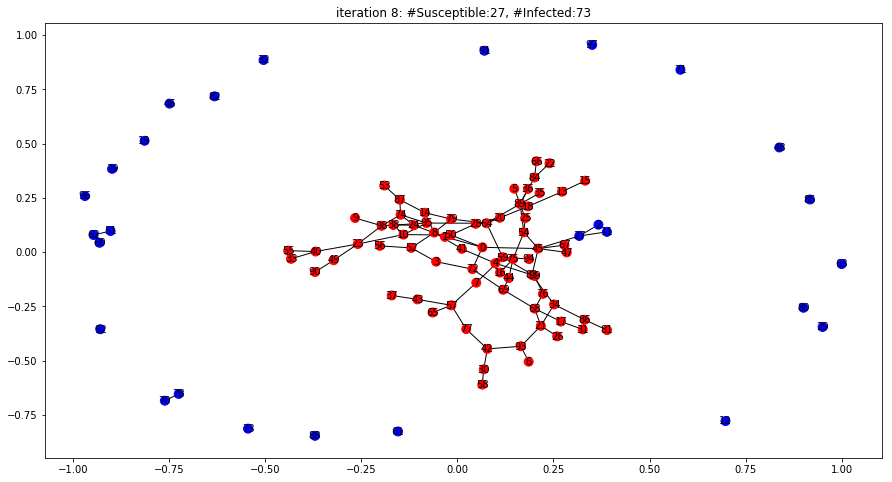

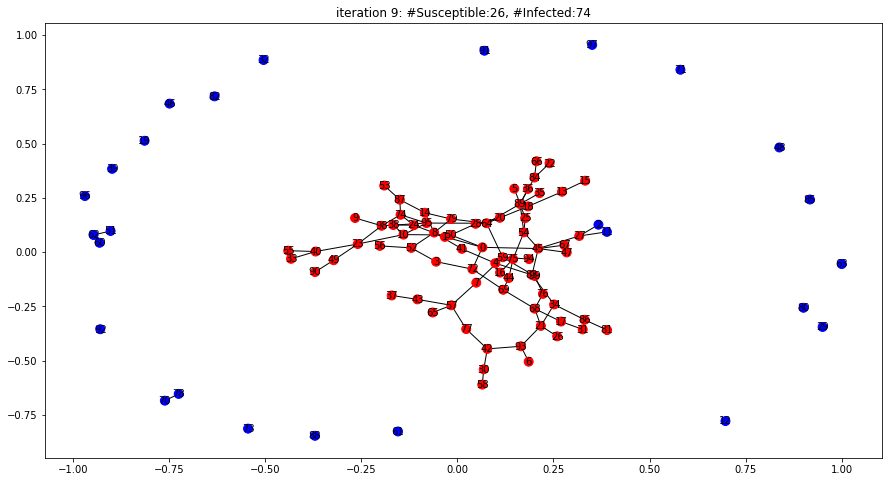

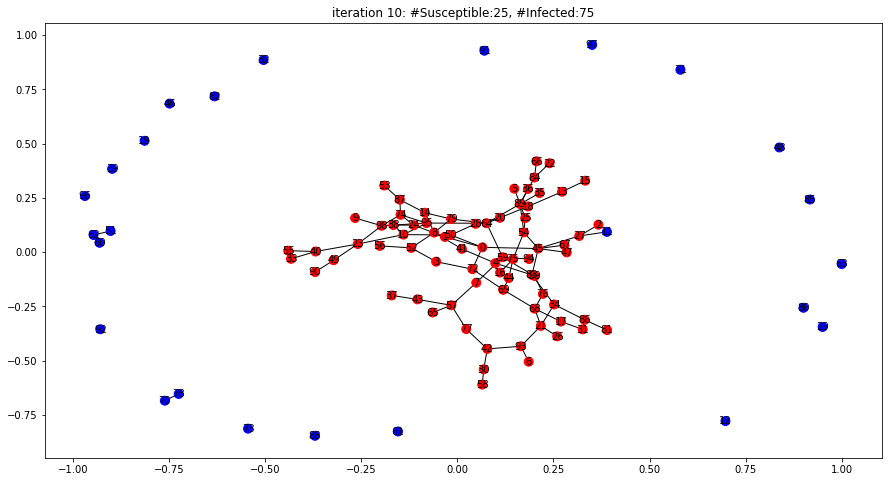

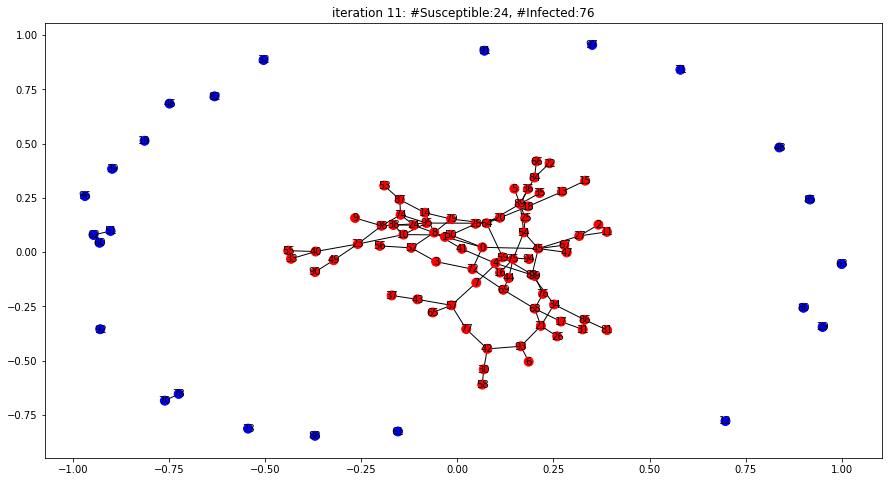

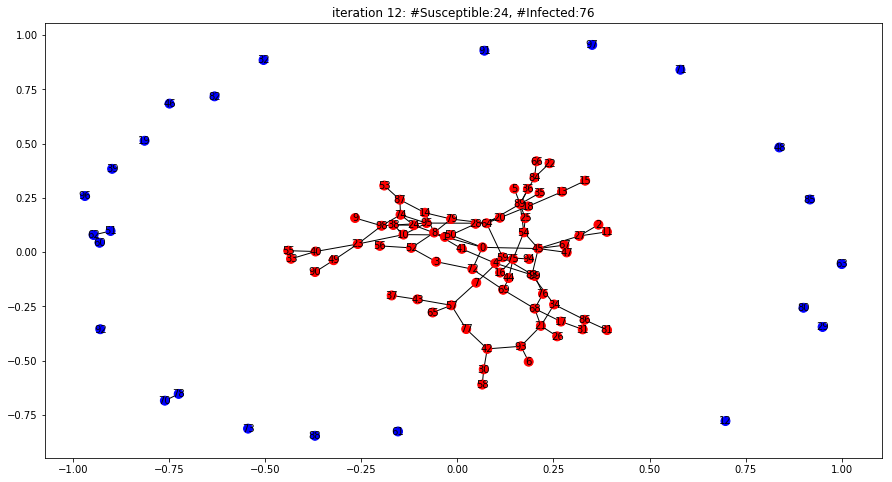

In [153]:
spread_contagion(labels, q_a)

### Betweenness derived infection

In [ ]:
sorted(nx.betweenness_centrality(G).items(), key=lambda pair:pair[1], reverse=True)

In [ ]:
a_po = equal_po + [[2,0],[0,0]]
q_a = a_po[1,1]/(a_po[0,0]+a_po[1,1])

labels = init_labels()
plt.figure(figsize=(15,8))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\betweenness\\init.png')

In [ ]:
metric_infection(labels, nx.betweenness_centrality)

In [ ]:
susceptibles = susceptibleList(labels)

plt.figure(figsize=(15,8))
plt.title("#Susceptibles:{}, #Infected:{}".format(len(susceptibles),len(labels)-len(susceptibles)))
nx.draw_networkx(G,pos,node_color=labels.values(),font_size=10,node_size=80)
#plt.savefig('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\betweenness\\randominf.png')

In [ ]:
spread_contagion(labels, q_a)

In [ ]:
import cv2,os

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 0.5

img1 = cv2.imread('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images\\betweenness\\a_po1\\first_try\\init.png')
height , width , layers =  img1.shape


for subdir, dirs, files in os.walk('C:\\Users\\canta\\Desktop\\uni\\GA\\Lab\\lab3\\images'):
    #
    #if not dirs:
        print(subdir)
        video = cv2.VideoWriter(subdir + '\\video\\video.avi',fourcc, fps,(width,height))
        for file in files:

            aux = os.path.join(subdir, file)
            print("---",aux)
            img1 = cv2.imread(aux)
            video.write(img1)

        cv2.destroyAllWindows()
        video.release()

    #print("//////////////////\n")
